In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("winequality-red.csv")

In [3]:
print("row, col ", train.shape)

row, col  (1599, 12)


In [4]:
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
train.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
train['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

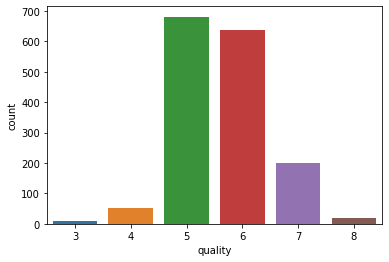

In [7]:
sns.countplot(train['quality'])

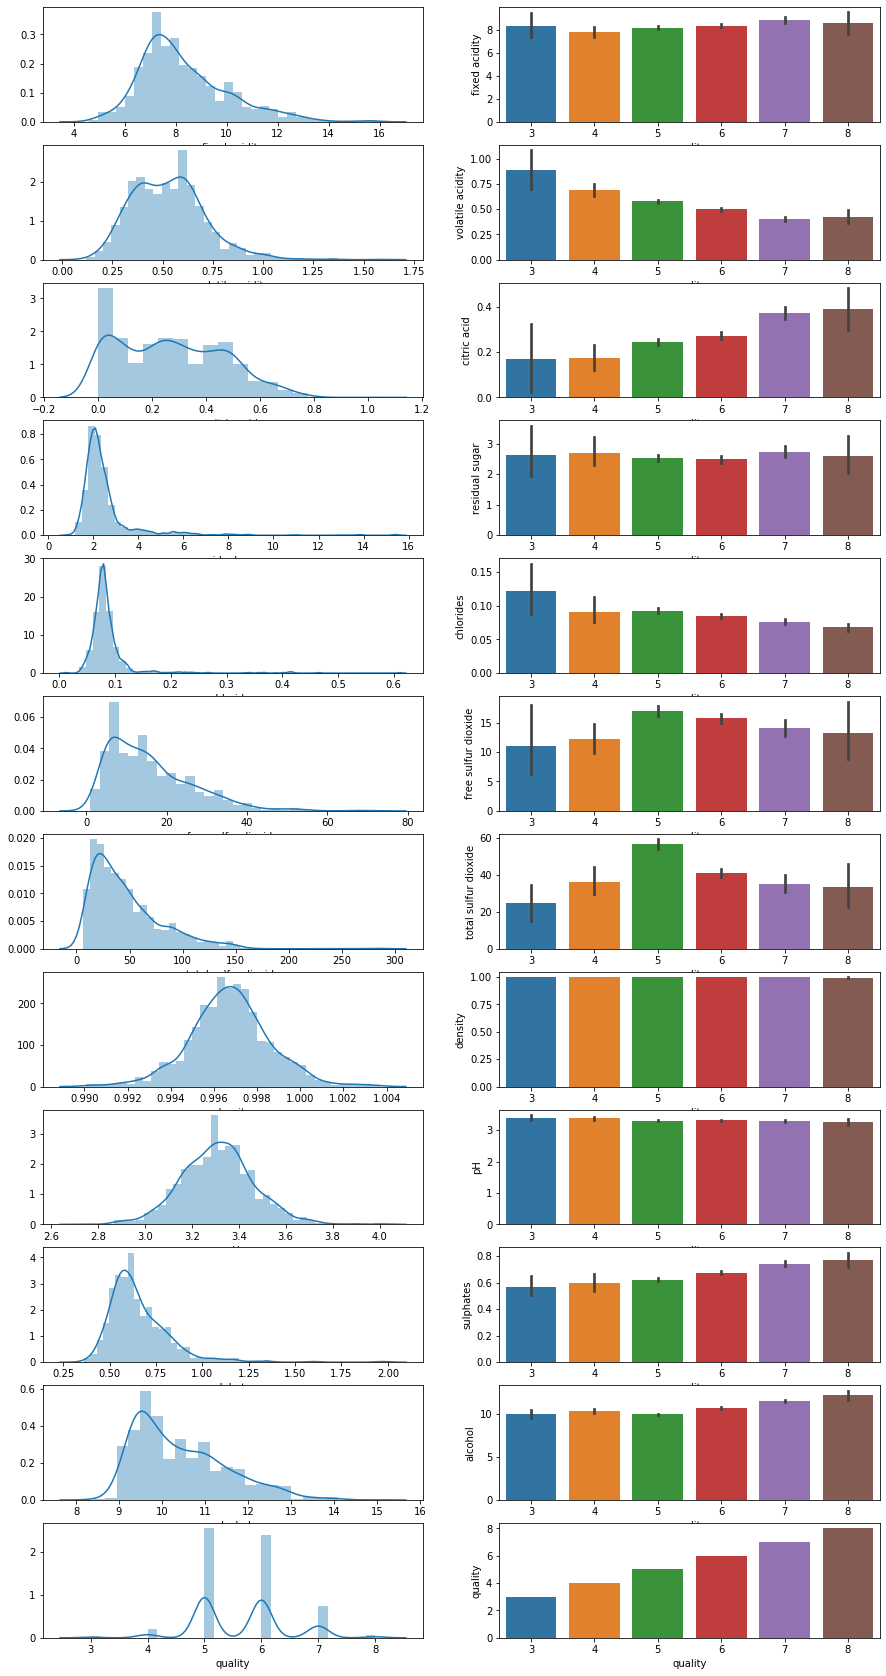

In [8]:
index = 1
plt.figure(figsize=(15, 30))
for col in train.columns:
    plt.subplot(12, 2, index)
    sns.distplot(train[col])
    index += 1
    plt.subplot(12, 2, index)
    sns.barplot(x=train['quality'], y=train[col])
    index += 1

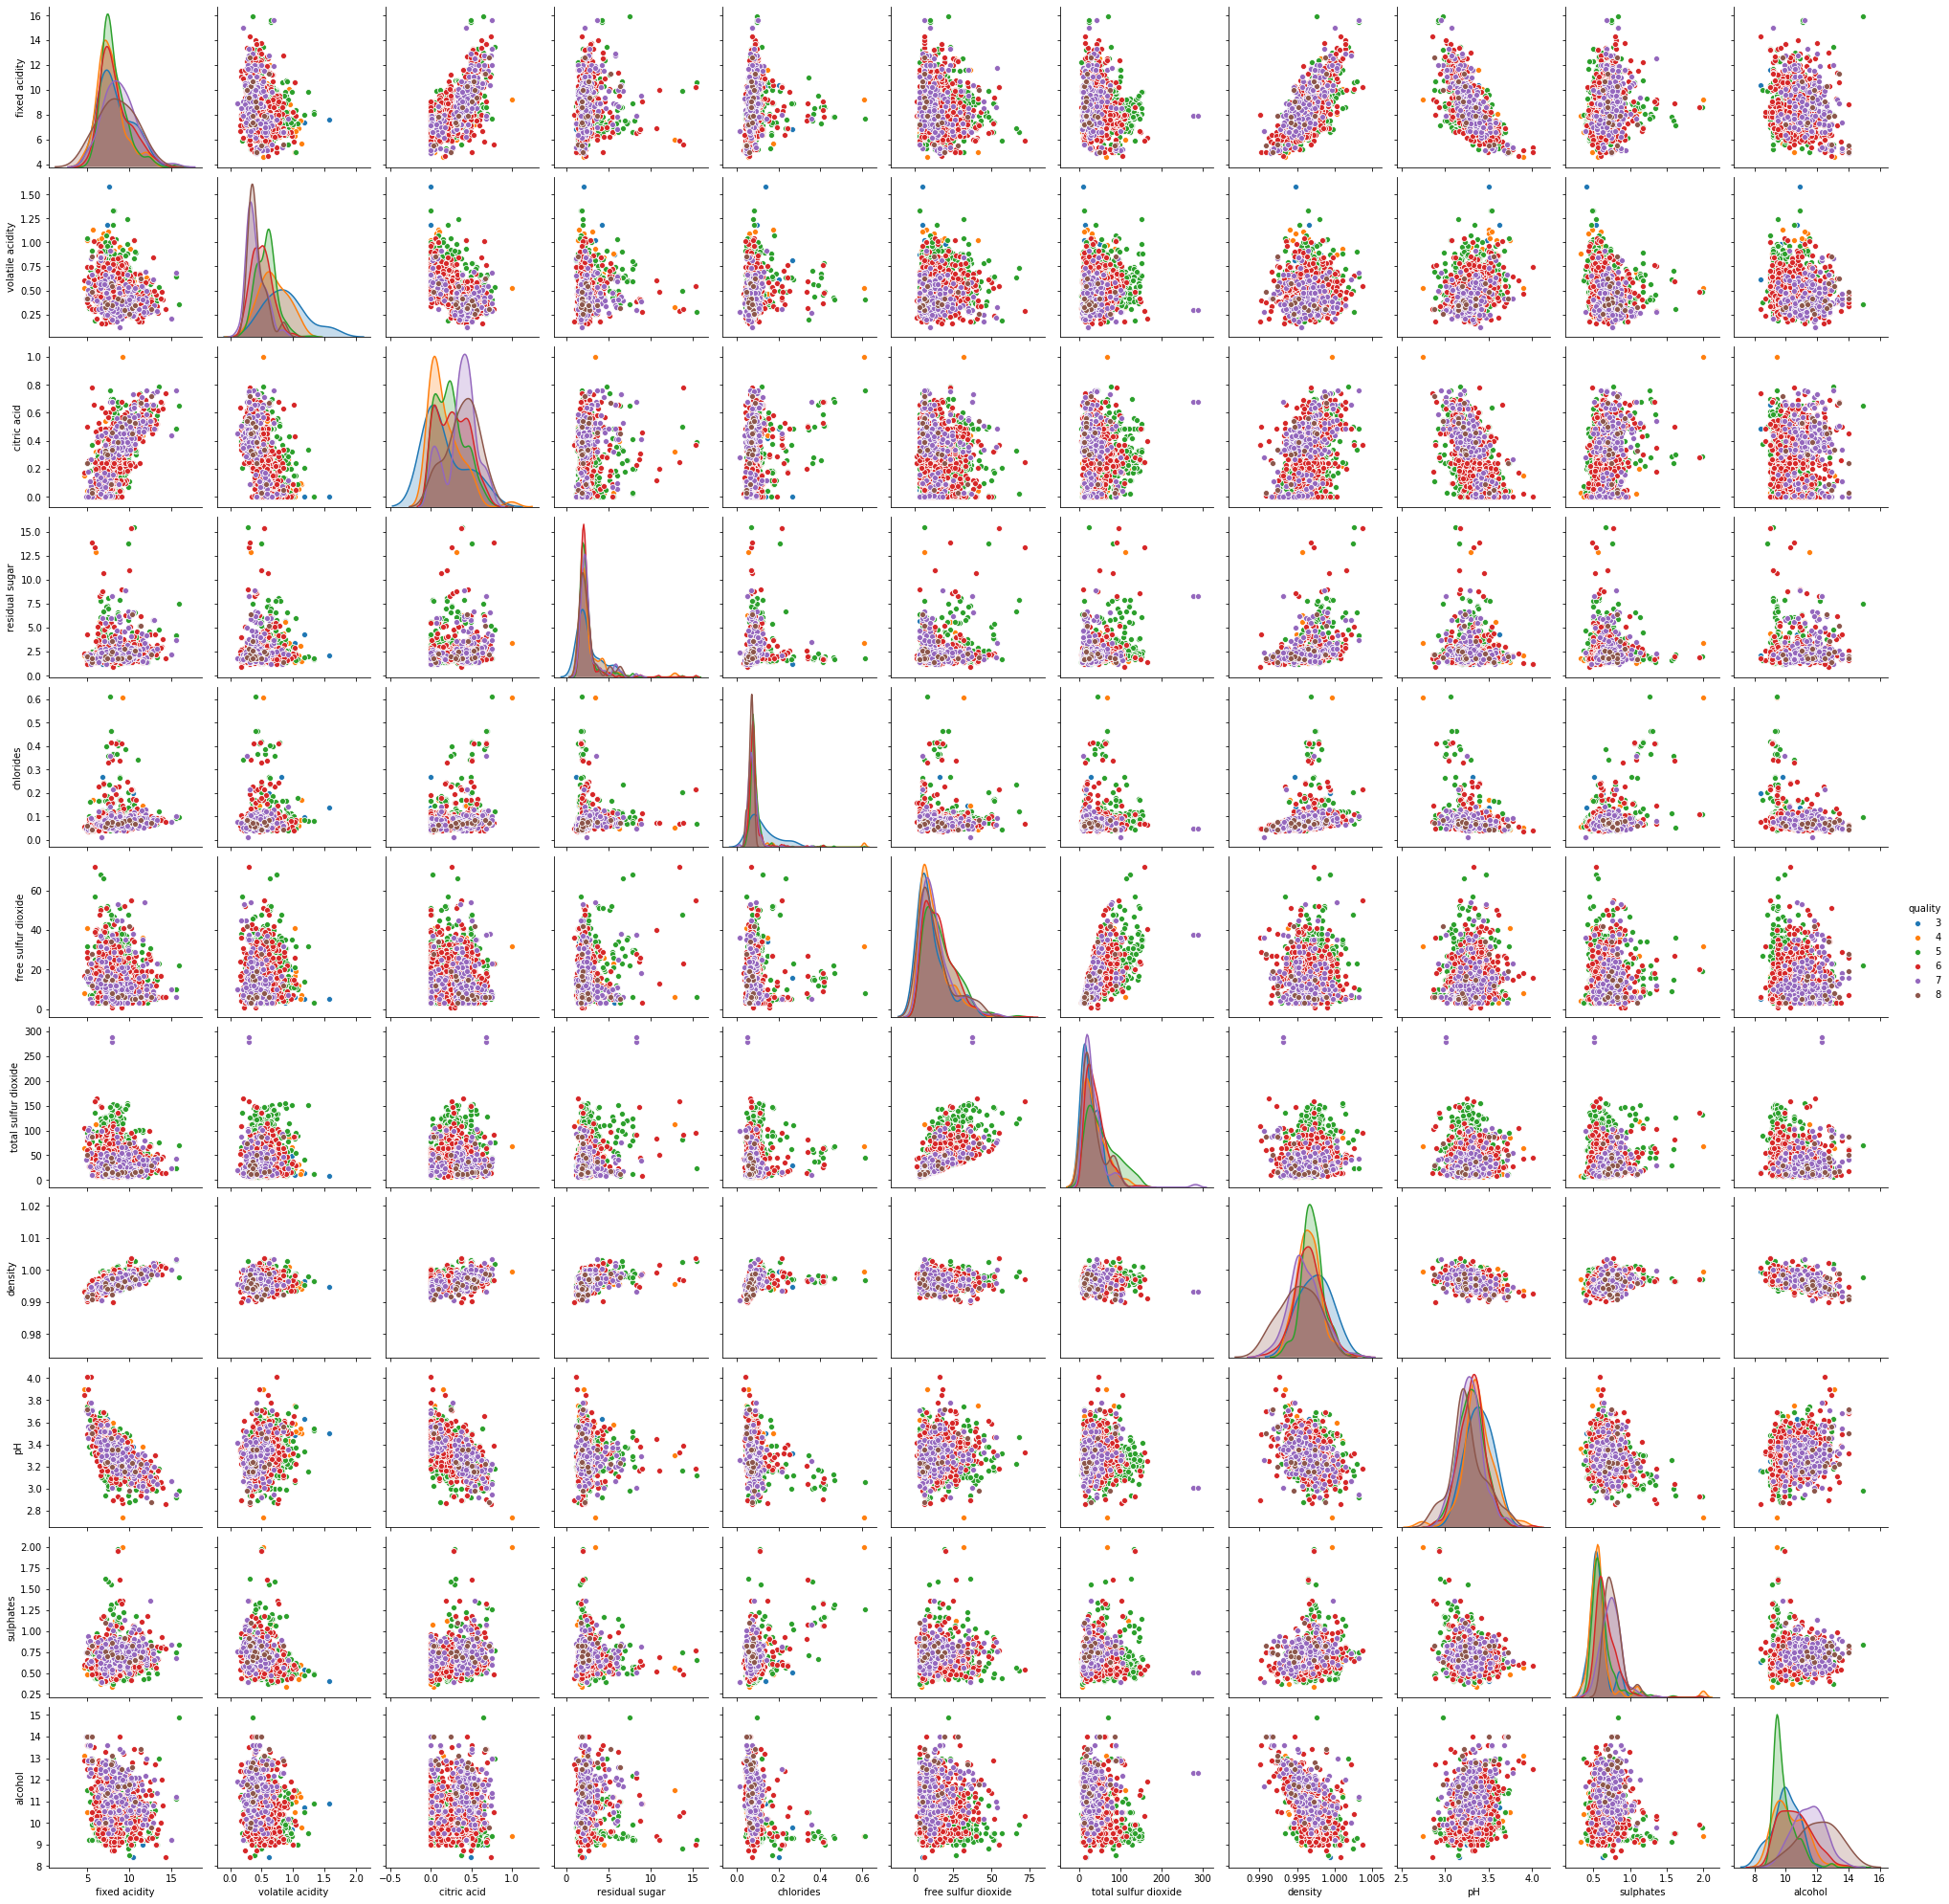

In [9]:
sns.pairplot(train, hue='quality')

In [10]:
#Break quality into two values: one has all the data whose quality value is more than 6

train["Quality"] = [1 if x>6 else 0 for x in train['quality']]

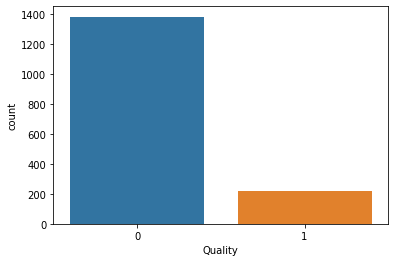

In [11]:
sns.countplot(train['Quality'])

In [28]:
train.drop('quality', axis=1, inplace=True)

In [29]:
#Generate more data by using resample, since current data is skewed

from sklearn.utils import resample, shuffle

zero = train[train['Quality']==0]
ones = train[train['Quality']==1]

In [30]:
upsample = resample(ones, replace=True, n_samples=zero.shape[0])

train2 = pd.concat([zero, upsample])
train3 = shuffle(train2)

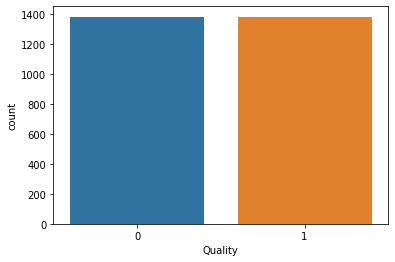

In [31]:
sns.countplot(train3['Quality'])

In [32]:
train3.shape

(2764, 12)

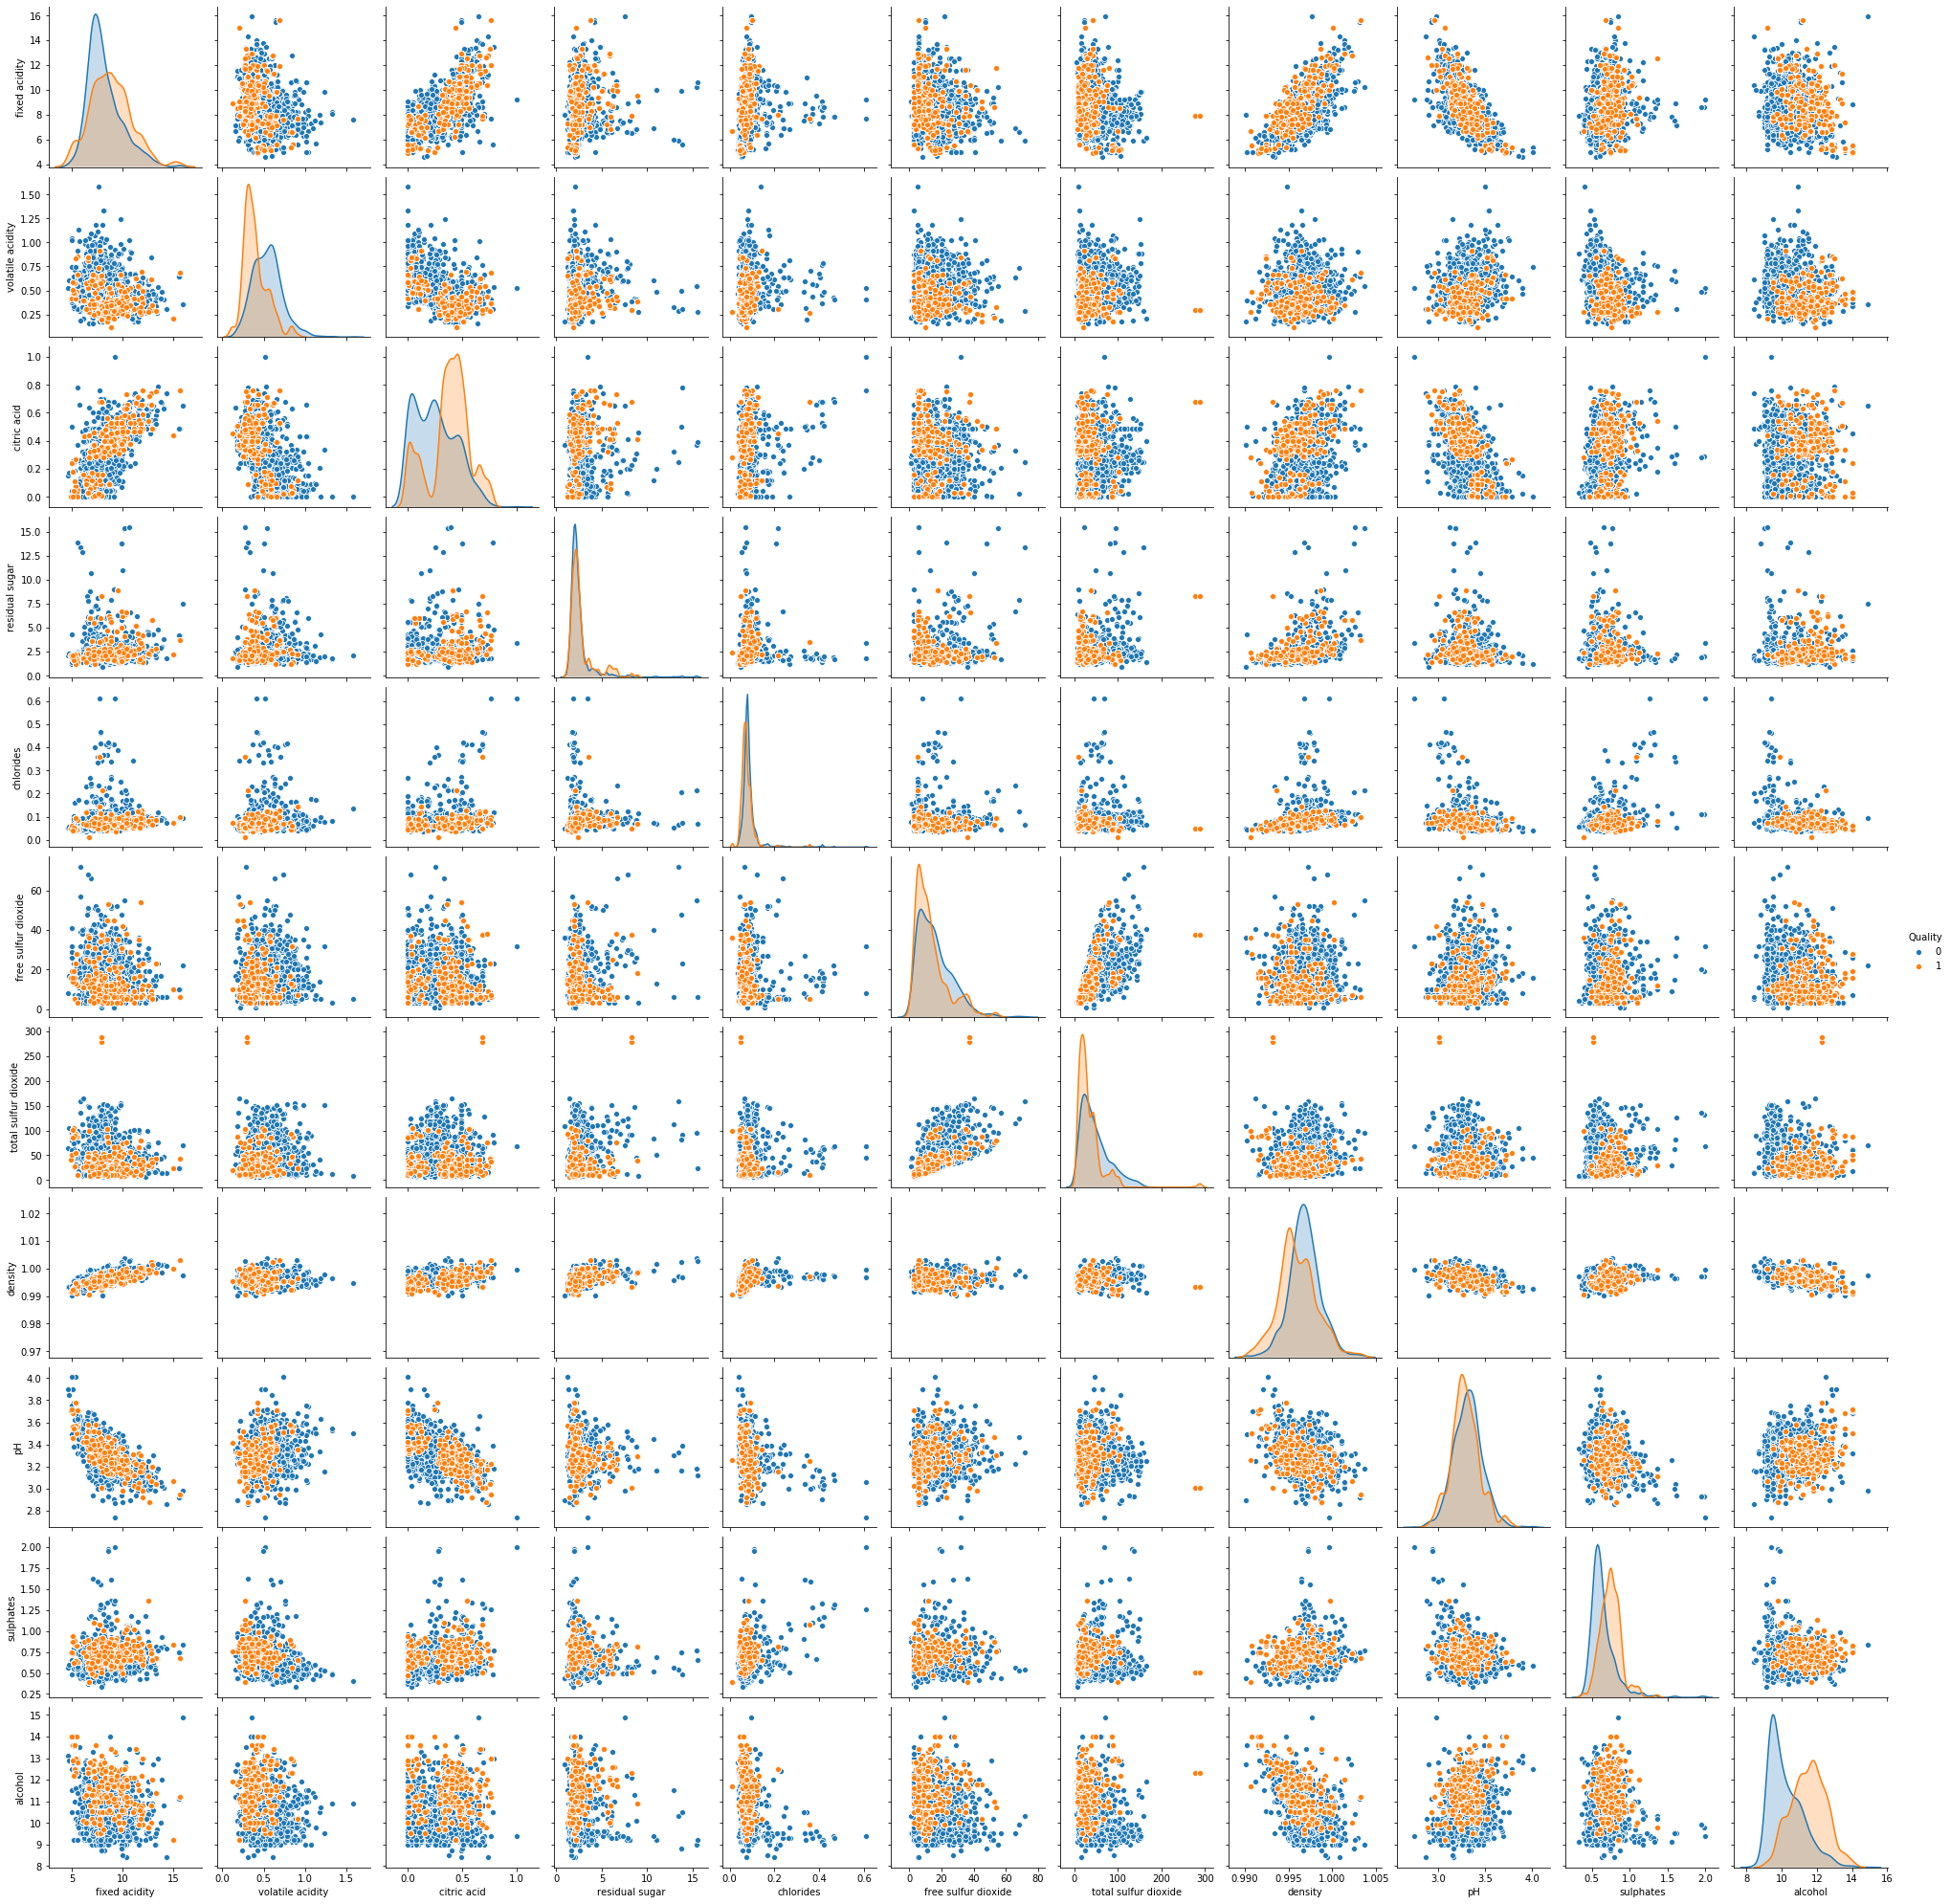

In [36]:
sns.pairplot(train3, hue='Quality')

In [37]:
from sklearn.model_selection import train_test_split
X = train3.drop(['Quality'], axis=1)
y = train3.Quality

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [39]:
#Do the preprocessing
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_train = ss.fit_transform(X_train.values)
X_test = ss.transform(X_test.values)

In [40]:
X_train = pd.DataFrame(X_train, columns=X.columns)

In [41]:
X_test = pd.DataFrame(X_test, columns=X.columns)
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.016380,0.202444,1.608273,-0.143769,0.591056,-0.864151,-0.804328,0.410141,-1.370362,-0.227149,0.777412
1,-0.824491,-0.414423,0.014583,0.721348,-0.533416,-0.577957,-0.376381,-1.103698,-0.132615,-1.281404,0.347418
2,2.226096,-0.975211,2.106301,0.000417,0.297715,-0.577957,-0.406949,1.422582,-0.653771,0.455016,-0.082576
3,-0.351124,-0.975211,1.807484,4.109720,-0.802312,2.140888,7.571203,-1.585812,-1.891518,-1.157374,1.207406
4,-0.719299,0.735192,-1.479501,-0.504234,0.322160,-0.482559,-0.315246,-0.698722,1.039988,-1.033344,0.777412


In [42]:
X_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.666702,0.594995,-0.085023,-0.143769,-0.215631,-0.005568,0.418377,0.169084,1.039988,-0.661254,-0.598569
1,2.120904,-0.358344,1.110245,0.144603,0.493276,0.376024,-0.009570,1.417760,-0.588627,0.393001,0.347418
2,0.805995,-1.143447,1.110245,-0.215862,-0.435636,-0.768753,-0.468084,-0.549266,-0.849205,-1.033344,1.379404
3,0.122243,1.043626,-0.284234,-0.648420,-0.215631,-1.054947,-0.559787,0.313719,-0.979494,0.268971,-1.458557
4,0.963784,-0.190108,2.056498,2.848092,-0.215631,2.188587,1.060297,1.229736,-0.849205,0.951136,0.949410


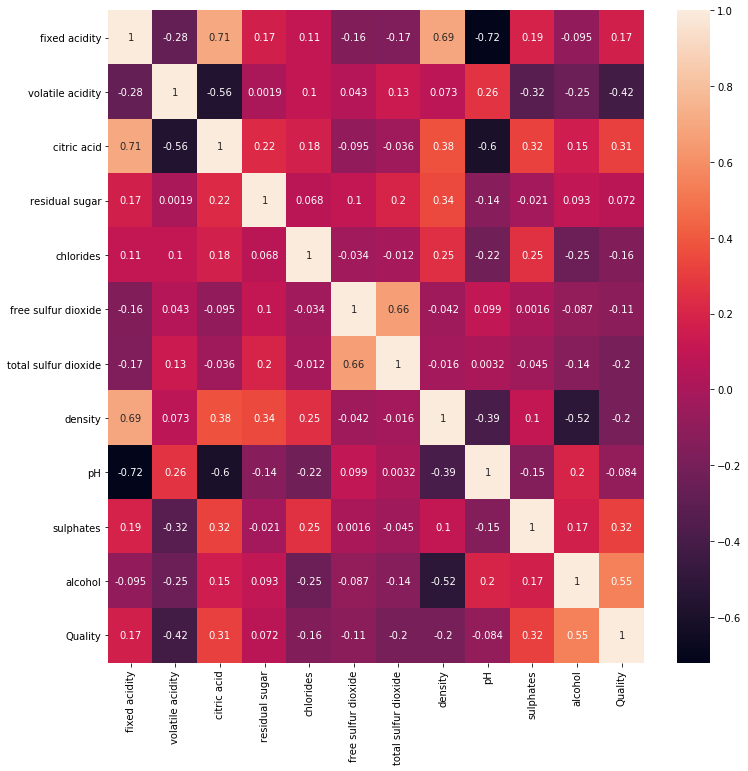

In [43]:
plt.figure(figsize=(12, 12))
sns.heatmap(train3.corr(), annot=True)

In [44]:
#Apply XGBoost algorithm first

from xgboost import XGBClassifier
model = XGBClassifier().fit(X_train, y_train)

[12:20:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [45]:
pred = model.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9710564399421129

In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[327,  20],
       [  0, 344]], dtype=int64)

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [65]:
algo = {"XGBClassifier": XGBClassifier(),
        "DecisionTreeClassifier": DecisionTreeClassifier(),
       "LogisticRegression": LogisticRegression(),
       "RandomForestClassifier": RandomForestClassifier(),
       "KNeighborsClassifier": KNeighborsClassifier(),
       "GaussianNB": GaussianNB(),
       "SVC": SVC(kernel='linear', C=1, random_state=42)}

In [66]:
#Calculate and print accuracy_score of each algo

for keys, values in algo.items():
    model1 = values.fit(X_train, y_train)
    pred1 = model1.predict(X_test)
    score = accuracy_score(y_test, pred1)
    print(f"{keys}: {score} \n")

[14:18:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier: 0.9710564399421129 

DecisionTreeClassifier: 0.9739507959479016 

LogisticRegression: 0.8176555716353111 

RandomForestClassifier: 0.9667149059334298 

KNeighborsClassifier: 0.91027496382055 

GaussianNB: 0.804630969609262 

SVC: 0.8133140376266281 



In [67]:
#Apply cross_val_score function to check robustness

from sklearn.model_selection import cross_val_score
for key, value in algo.items():
    score = cross_val_score(value, X, y, cv=5)
    print(f"{key}: {score.mean()} \n")

[14:18:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [70]:
#RandomForestClassifier seems to be the best

from sklearn.metrics import classification_report
rfc = RandomForestClassifier(random_state=42)
model3 = rfc.fit(X_train, y_train)
pred3 = model3.predict(X_test)
print(classification_report(pred3, y_test))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       328
           1       1.00      0.95      0.97       363

    accuracy                           0.97       691
   macro avg       0.97      0.97      0.97       691
weighted avg       0.97      0.97      0.97       691

